In [ ]:
"""
Source:
https://gist.github.com/amueller/4299381
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.utils import shuffle
import tensorflow as tf
import makedata 
import random

In [2]:
x_train, _, _, _, y_train, _ = makedata.cifar10()

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
full data info:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape:  (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [3]:
# Reshape
X_train = np.reshape(x_train, (50000, 3072))

# Shuffle 
for i in range(50000):
    random.shuffle(X_train[i])

# Reshape
#x_train = np.reshape(xxtrain, (50000, 32, 32, 3))


In [4]:
#X_train = np.reshape(x_train, (50000,(32*32*3)))
y_train = np.array(y_train)

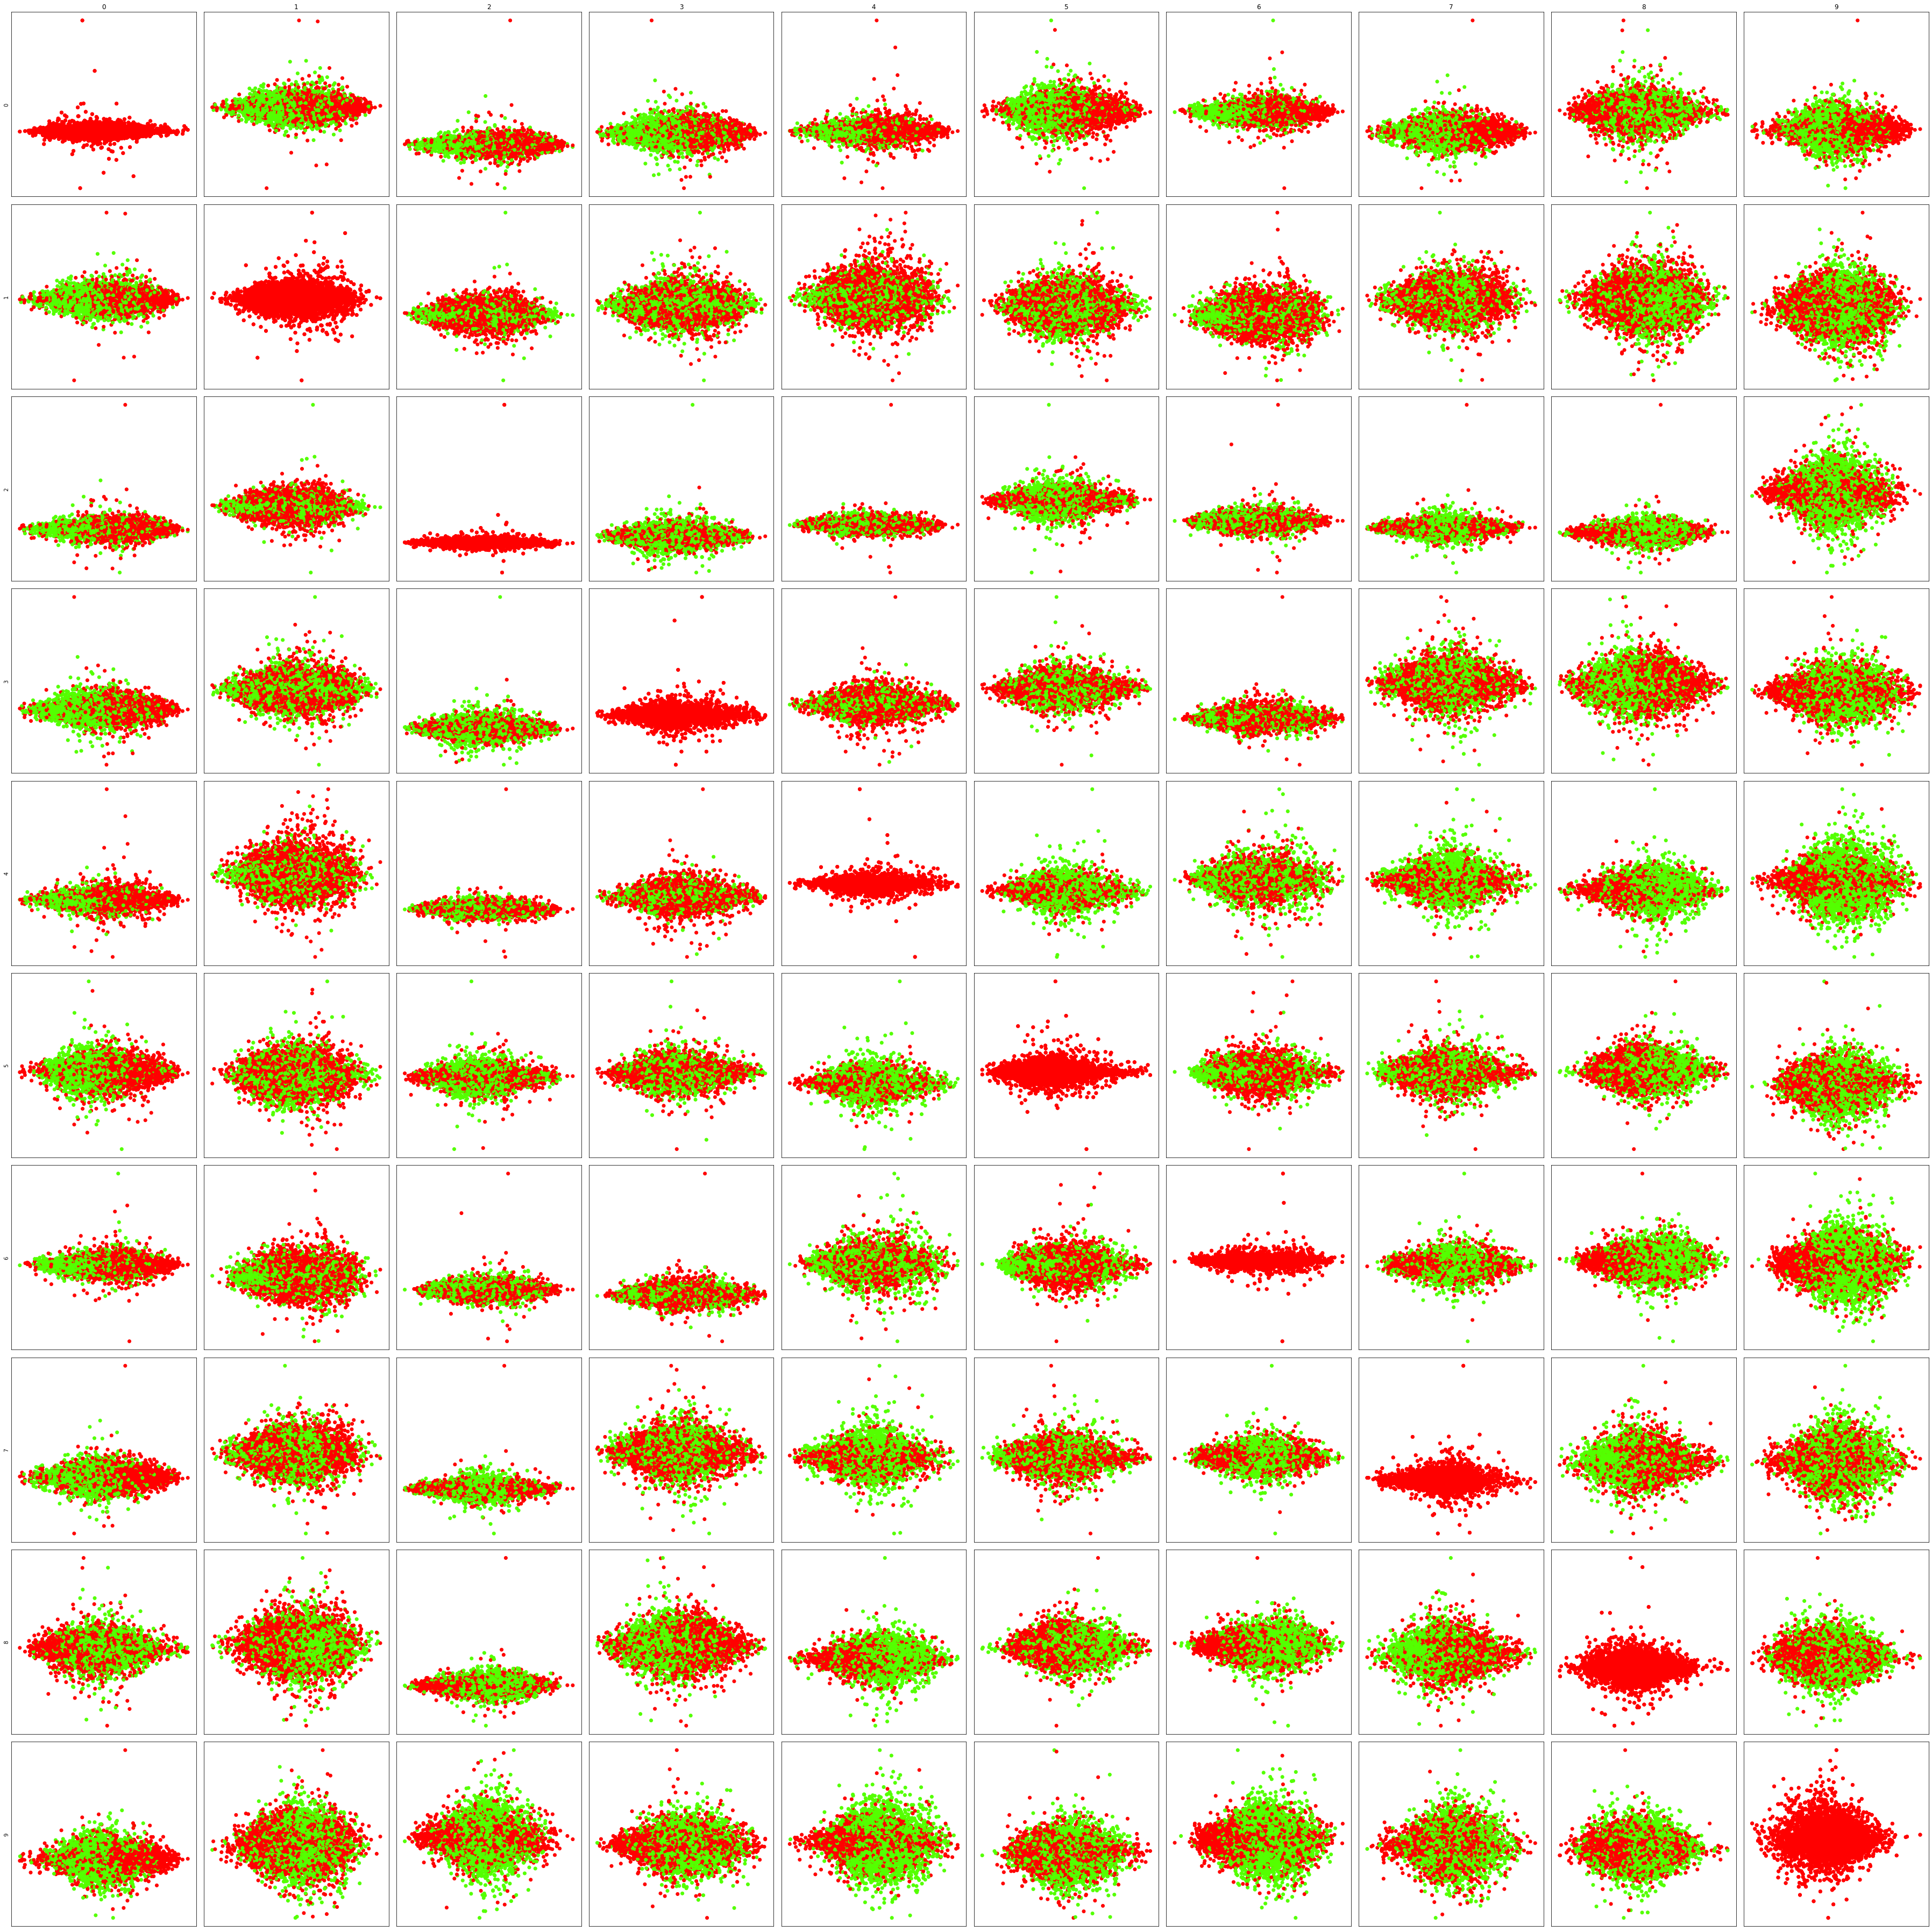

In [5]:
pca = RandomizedPCA(n_components=2)
fig, plots = plt.subplots(10, 10)
fig.set_size_inches(50, 50)
plt.prism()
for i, j in product(range(10), repeat=2):
    if i > j:
        continue
    X_ = X_train[(y_train == i) + (y_train == j)]
    y_ = y_train[(y_train == i) + (y_train == j)]
    X_transformed = pca.fit_transform(X_)
    
    plots[i, j].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_)
    plots[i, j].set_xticks(())
    plots[i, j].set_yticks(())
  
    plots[j, i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_)
    plots[j, i].set_xticks(())
    plots[j, i].set_yticks(())
    if i == 0:
        plots[i, j].set_title(j)
        plots[j, i].set_ylabel(j)
    
    #plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_)
plt.tight_layout()
plt.savefig("cifar10_unodered_shuffle_pairs.png")